# RX4: DDT in the Tennessee River

Chemical and manufacturing plants have historically discharged toxic waste materials into nearby rivers and streams. These toxicants have a detrimental effect on the plant and animal life inhabiting the river and the river's bank. One type of pollutant, commonly known as DDT, is especially harmful to fish and, indirectly, to people. A study was undertaken to examine the DDT content of fish inhabiting the Tennessee River and its tributaries. The Tennessee River flows in a west-east direction across the northern part of the state of Alabama, through Wheeler Reservoir, a national wildlife refuge. Ecologists fear that contaminated fish migrating from the mouth of the river to the reservoir could endanger other wildlife that prey on the fish.

![](https://i.imgur.com/BJqeBxU.gif)

A manufacturing plant was once located along Indian Creek, which enters the Tennessee River 321 miles upstream from the mouth. Although the plant has been inactive for over 10 years, there is evidence that the plant discharged toxic materials into the creek, contaminating all the fish in the immediate area. Have the fish in the Tennessee River and its tributary creeks also been contaminated? And if so, how far upstream have the contaminated fish migrated? To answer these and other questions, members of the U.S. Army Corps of Engineers collected fish specimens at different locations along the Tennessee River (TR) and three tributary creeks: Flint Creek (FC, which enters the river 309 miles upstream from the river’s mouth), Limestone Creek (LC, 310 miles upstream), and Spring Creek (SC, 282 miles upstream). Each fish was first weighed (in grams) and measured (length in centimeters), then the fillet of the fish was extracted and the DDT concentration (in parts per million) of the fillet was measured. Three species of fish were examined: channel catfish, largemouth bass, and smallmouth buffalo.

The fish.txt data file contains the location, length, weight, and DDT measurements for a total of 144 fish specimens. Obviously, not all the fish in the Tennessee River and its tributaries were captured, so the data represent a sample collected from the population of all fish. The U.S. Army Corps of Engineers used the data in this file to compare the DDT contents of fish at different locations and among the different species, and to determine the relationship (if any) of length and weight to DDT content. We will investigate some of these issues in this exercise.

(Data description taken from Mendenhall and Sincich, 2007, Statistics for Engineering and the Sciences, 5th edition, Pearson Prentice Hall: Upper Saddle River, NJ)

-----

## Import Data
First lets import the data in to R. 

<span class="girk">**EXERCISE 1:**</span> Use the read.delim() command to save the "fish.txt" file in the git repository into an R object called "fish". You can do this with the following arguments:
```
read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/fish.txt", header = TRUE, sep = "\t", dec = ".")
```

Make sure when you are storing this as an R object, you use the "<-" symbol, NOT "=". 

Output a summary of your R object "fish" to see what the data includes, then use attach() to associate the column headers with the data. Then we can use the column headers directly as variables.


In [1]:
fish <- read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/fish.txt", header = TRUE, sep = "\t", dec = ".")
summary(fish)
attach(fish)

    RIVER                MILE         SPECIES              LENGTH     
 Length:144         Min.   :  1.0   Length:144         Min.   :17.50  
 Class :character   1st Qu.:283.8   Class :character   1st Qu.:40.50  
 Mode  :character   Median :300.0   Mode  :character   Median :45.00  
                    Mean   :268.6                      Mean   :42.81  
                    3rd Qu.:320.0                      3rd Qu.:47.50  
                    Max.   :345.0                      Max.   :52.00  
     WEIGHT            DDT          
 Min.   : 173.0   Min.   :   0.110  
 1st Qu.: 805.5   1st Qu.:   3.375  
 Median :1000.0   Median :   7.150  
 Mean   :1049.7   Mean   :  24.355  
 3rd Qu.:1257.8   3rd Qu.:  13.000  
 Max.   :2302.0   Max.   :1100.000  

## Exploratory Data Analysis

As we have discussed in class, it is a good idea to create some plots of the data before beginning analysis, just to get a feel for distributions and relationships. 

<span class="girk">**EXERCISE 2:**</span> Start by plotting a histogram of the DDT concentration data.Does DDT concentration appear to be normally distributed? Do you expect that a linear model of DDT concentration can lead to residuals that are normally distributed? Do you think a transformation of the DDT data would help you to see relationships any better?



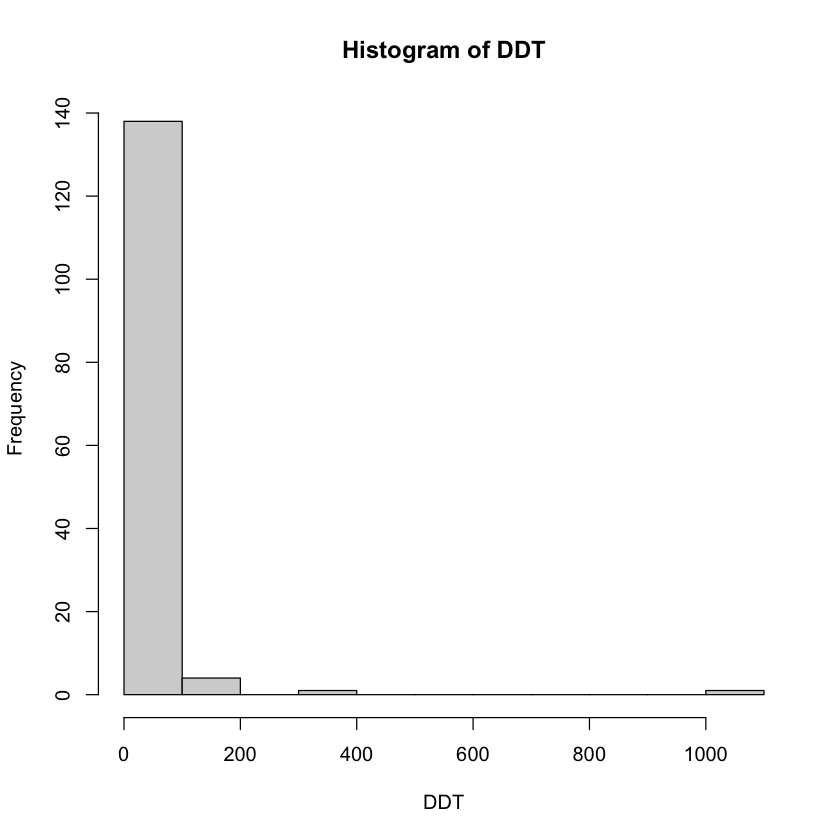

In [39]:
hist(DDT)
#The distribution does not appear to be normal.
#a log transformation is worth a try.

For data that are limited to positive values and are highly skewed, such as the DDT data, it is often useful to work with the natural logarithm of the values.

<span class="girk">**EXERCISE 3:**</span> Create a variable called LN.DDT with the command:
```
LN.DDT = log(DDT)
```
Repeat the process using LN.DDT in place of DDT. Now what do you conclude?

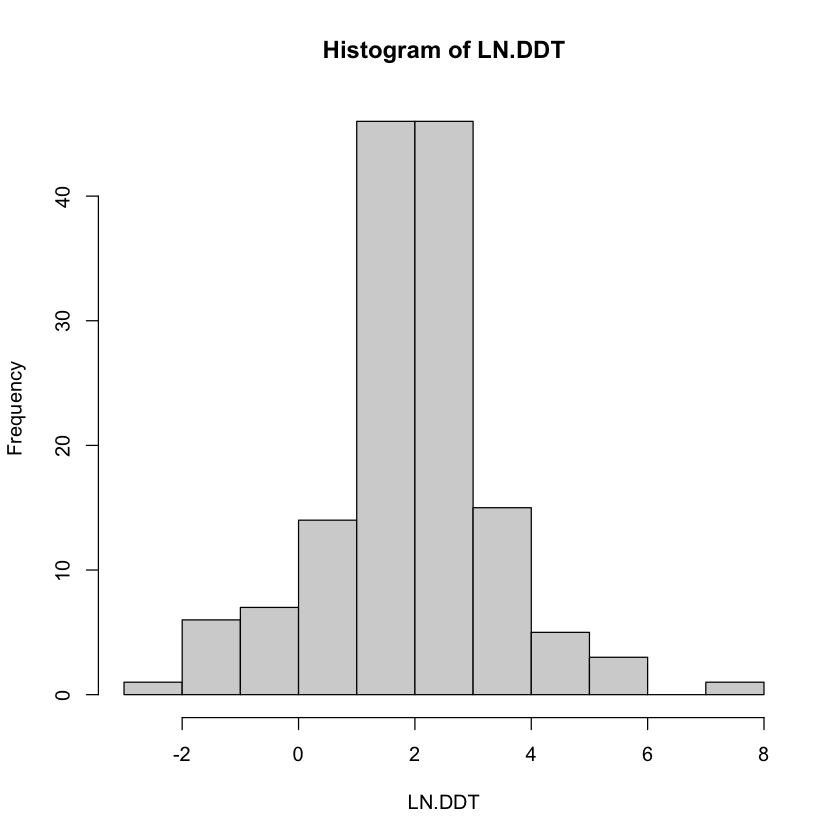

In [40]:
LN.DDT=log(DDT)
hist(LN.DDT)
#This looks a lot more like normal distribution now.

Paired numerical data are often viewed with a scatterplot. As we’ve seen, these can be produced using the plot() function. However, this function has a few different ways it can be used.
For instance, we can plot DDT concentration against fish length or weight measurements with any two of these separated by a comma. As the dataset is attached, we can refer to these variables by their names:

```
plot(WEIGHT, DDT)
```
If we think of the DDT concentration as being determined by the fish size, then we might want to use R’s model formula notation. This puts the dependent variable on the left of a tilde, ~, and the independent variable(s) on the right:
```
plot(DDT ~ WEIGHT)
```
When the data set is not attached, the model formula notation allows one to briefly attach the data using the data= argument:
```
plot(DDT ~ WEIGHT, data=fish)
```
As well, the argument subset= can be used with a logical expression to reduce the number of points plotted. This example plots only fish caught in Spring Creek:
```
plot(DDT ~ WEIGHT, subset=RIVER=="SC")
```
Use your scratchpad to practice these commands and their arguments.

<span class="girk">**EXERCISE 4:**</span> Create scatterplots of DDT against fish length and also against weight. Do each of the relationships appear to be approximately linear? Are there any outliers?

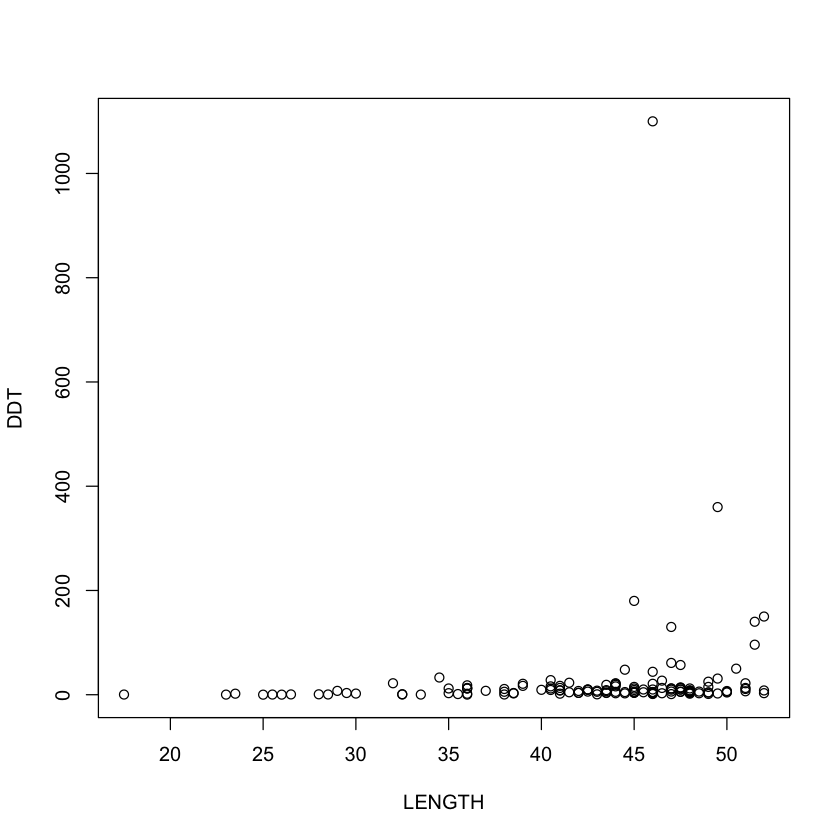

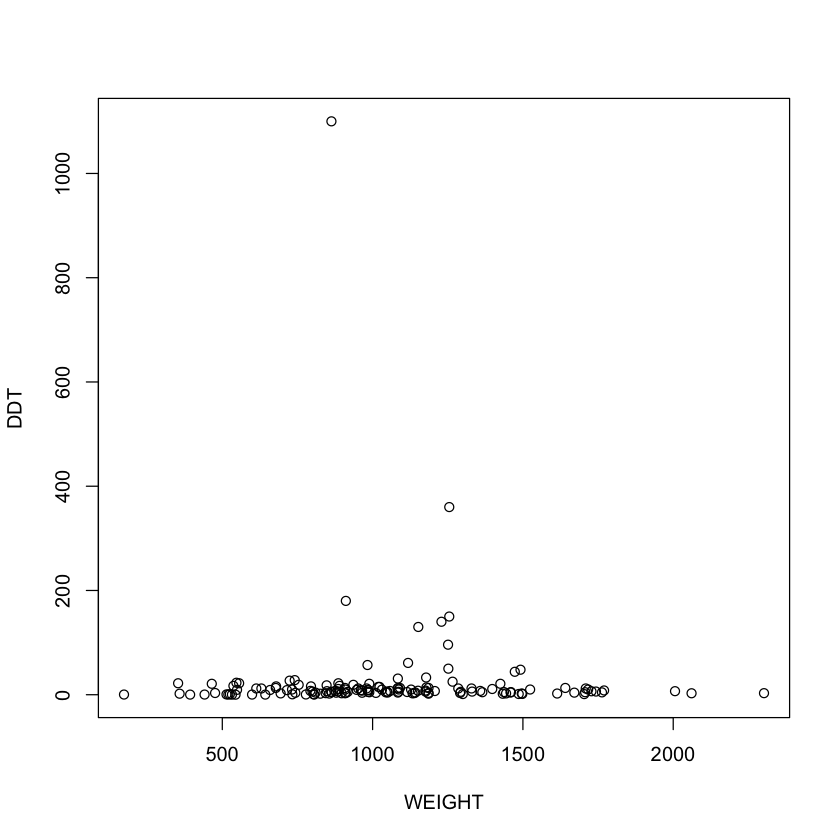

In [41]:
plot(DDT~LENGTH)
plot(DDT~WEIGHT)
#Neither of these two relationships appear to be approximately linear.
#Also, in either relationship there are a few (at least 3 each) outliers.

<span class="girk">**EXERCISE 5:**</span> Repeat these plots using LN.DDT instead. Does this improve the linearity and reduce the outliers? Based on the scatterplots, do you expect positive or negative, large or small, correlations between the variables? Why? 

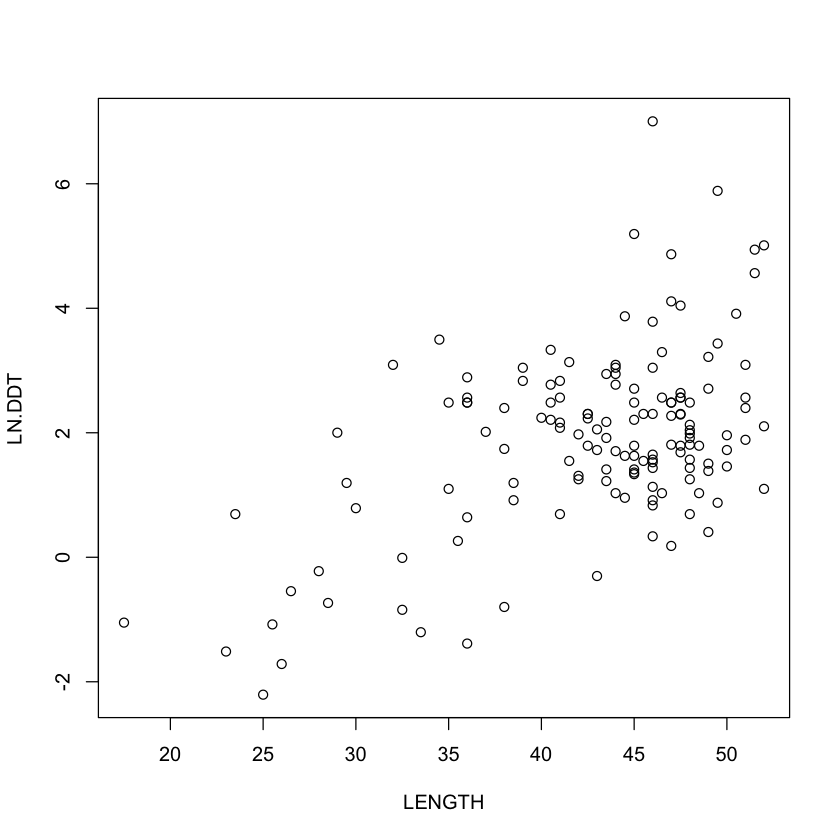

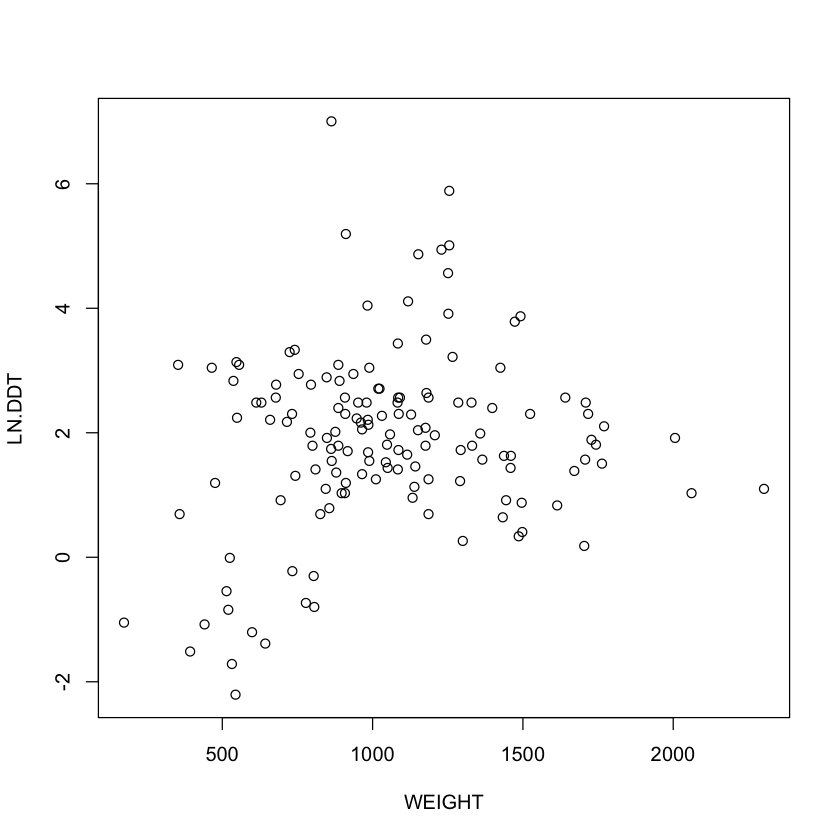

In [42]:
plot(LN.DDT~LENGTH)
plot(LN.DDT~WEIGHT)
#These plots of LN.DDT look a lot closer to linearity.
#Also now there aren't any serious outliers.
#Based on these scatterplots, the correlation of DDT with LENGTH or with WEIGHT is not very clear.
#I speculate both correlations will be low and predominantly driven by the outliers.
#So DDT should have a small positive correlation with LENGTH and a small negative correlation with WEIGHT.
#I expect LN.DDT to be positively correlated with both LENGTH and WEIGHT.
#I expect the correlation with LENGTH to be higher than that with WEIGHT in magnitude

Lets calculate some correlation values to see if our speculations are corrrect. 

<span class="girk">**EXERCISE 6:**</span> Calculate and report the correlation coefficients for the variables using the cor() function to find out. What conclusions do you draw about the relationship between LN.DDT and fish weight or length? Does one relationship appear to be stronger than the other? Are either approximately linear?

Hint: cor() takes two arguments, each a variable, and returns the correlation coefficient. 


In [43]:
cor(LENGTH, DDT) #0.1261057
cor(WEIGHT, DDT) #-0.01190568
cor(LENGTH, LN.DDT) #0.5229223
cor(WEIGHT, LN.DDT) #0.1721914
#The relationship between LN.DDT and LENGTH appears to be strongly linear.
#The relationship between LN.DDT and WEIGHT also appears to be linear, but weaker.

[1] 0.1261057

[1] -0.01190568

[1] 0.5229223

[1] 0.1721914

## Linear Regression

Now that we have learned about linear regression, we can go a lot further in our analysis. For example, we can answer questions like, “What is the equation relating Y to X?” and “How reliably can we predict Y from X?”

The parameters, $β_{0}$ and $β_{1}$ , of a linear model are estimated using the method of least squares in R using the lm() function. The lm() function uses the model formula syntax. In this case, the linear model relating the log(DDT) concentration to weight is specified by

```
lm(LN.DDT ~ WEIGHT)
```

<span class="girk">**EXERCISE 7:**</span>  Fit the regression line between LN.DDT and LENGTH using the lm() function. What are the estimated values for the slope and intercept of this line? 

In [44]:
lm(LN.DDT ~ LENGTH)
#Estimated values are slope = 0.1096 and intercept = -2.7972.



Call:
lm(formula = LN.DDT ~ LENGTH)

Coefficients:
(Intercept)       LENGTH  
    -2.7972       0.1096  


<span class="girk">**EXERCISE 8:**</span> Use your results to predict the DDT concentration in a fish that is 35 cm long? (Don’t forget that you need to re- transform your response variable by **re-exponentiating** your predictions!)

Use exp(y) to re-exponentiate. This returns e^y.

In [45]:
exp(35*(0.1096)+(-2.7972)) #2.8258
#DDT concentration in a fish that is 35 cm long will be 2.8258

[1] 2.825824


The lm() function does not automatically return very much information, but we can get more out of it using some extractor functions. These operate on a stored model object created by a function such as lm(). Some examples of extractor functions are given in Table 1.

---
**Table 1. Extractor functions for R model objects**

| Function | Usage | 
| -------- | -------- | 
| summary()    | returns summary information about the regression     | 
| plot()    | makes diagnostic residual plots   | 
| coef()    | returns the estimated coefficients     | 
| residuals()   | returns the residuals    | 
| fitted()    | returns the fitted values for y     | 
| deviance()    | returns the residual sum of squares     | 
| predict()   | performs predictions for given values of x, including confidence intervals    | 
| anova()   | calculates various sums of squares    | 

---

<span class="girk">**EXERCISE 9:**</span> Put the results of your regression fit into an object called ddt.lm using the command: 
```
ddt.lm = lm(LN.DDT~LENGTH)
```

In [46]:
ddt.lm = lm(LN.DDT~LENGTH)

<span class="girk">**EXERCISE 10:**</span> You can now handle ddt.lm as an R object. Begin by adding your fitted line to your scatterplot of LN.DDT vs. LENGTH using the command:

```
abline(ddt.lm).
```
Remember you must plot your scatterplot FIRST, and then add your fitted line.

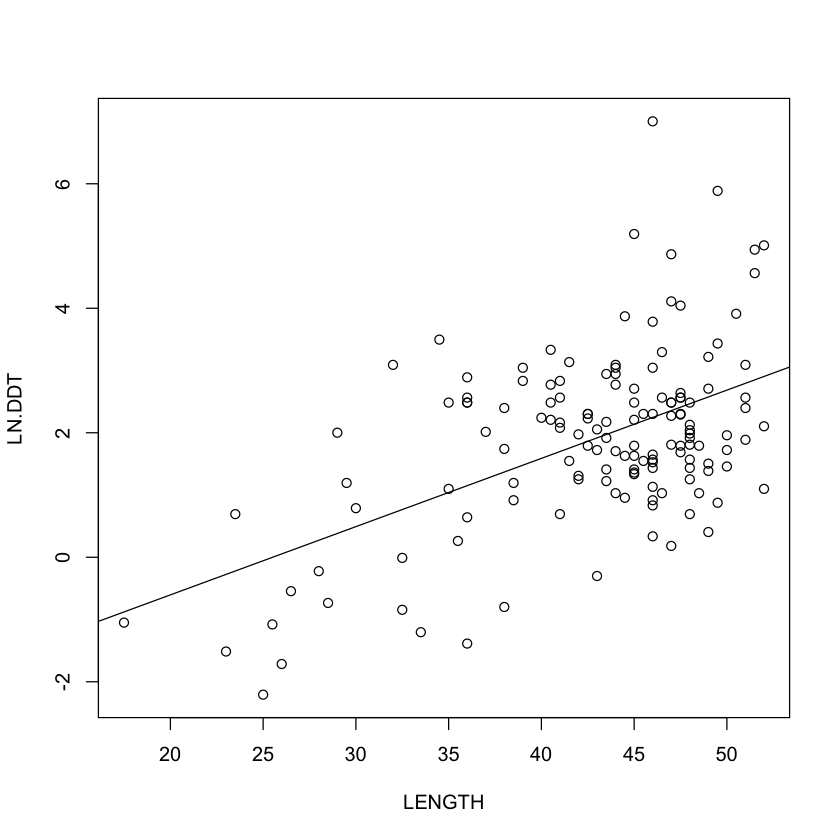

In [47]:
plot(LN.DDT~LENGTH)
abline(ddt.lm)

<span class="girk">**EXERCISE 11:**</span> View the full results of lm() by typing summary(ddt.lm). 

In [48]:
summary(ddt.lm)


Call:
lm(formula = LN.DDT ~ LENGTH)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5364 -0.7824 -0.1135  0.7994  4.7565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.7972     0.6503  -4.301 3.14e-05 ***
LENGTH        0.1096     0.0150   7.311 1.77e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.234 on 142 degrees of freedom
Multiple R-squared:  0.2734,	Adjusted R-squared:  0.2683 
F-statistic: 53.44 on 1 and 142 DF,  p-value: 1.774e-11


<span class="girk">**EXERCISE 12:**</span> One of the results returned is the “Multiple R-Squared” value (this is the measure of model fit we discussed in class). What value results from your model? Is the returned fit value equal to the square of the correlation coefficient between LN.DDT and LENGTH? Use the cor() command to find out.

In [49]:
(cor(LN.DDT, LENGTH))^2

[1] 0.2734477

<span class="girk">**EXERCISE 13:**</span> The function anova() as applied to an lm object will return the various sums of squares. Recalculate the R2 value as the regression sum of squares (given by R as the sum of squares associated with each predictor variable) divided by the total sum of squares (which is equal to the regression sum of squares plus the residual sum of squares).

In [50]:
anova(ddt.lm)
SSE=216.355
SSR=81.428 
R_Squared = SSR/(SSR+SSE) 
R_Squared
#So again the same value as above is obtained.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LENGTH,1,81.42822,81.428223,53.44362,1.773627e-11
Residuals,142,216.35526,1.523629,NA,NA


[1] 0.2734474